Análise Exploratória 

In [28]:
import pyreadr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
result = pyreadr.read_r('data/DebTrivedi.rda')
keys = list(result.keys())  # Converte as chaves em uma lista

df = result[keys[0]]
df.head()


,ofp,ofnp,opp,opnp,emer,hosp,health,numchron,adldiff,region,age,black,gender,married,school,faminc,employed,privins,medicaid
rownames,,,,,,,,,,,,,,,,,,,
1,5,0,0,0,0,1,average,2,no,other,6.9,yes,male,yes,6,2.8810,yes,yes,no
2,1,0,2,0,2,0,average,2,no,other,7.4,no,female,yes,10,2.7478,no,yes,no
3,13,0,0,0,3,3,poor,4,yes,other,6.6,yes,female,no,10,0.6532,no,no,yes
4,16,0,5,0,1,1,poor,2,yes,other,7.6,no,male,yes,3,0.6588,no,yes,no
5,3,0,0,0,0,0,average,2,yes,other,7.9,no,female,yes,6,0.6588,no,yes,no


In [37]:
df = df[['ofp','hosp', 'health', 'numchron', 'gender', 'school', 'privins']]
# ofp - num de colsultas médicas
# hosp - num de internações
# healh - estado de saude autopercebido
# numchron - num de condições cronicas
# gender
# school - num de anos de estudo
# privins - indicador de seguro privado

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4406 entries, 1 to 4406
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ofp       4406 non-null   int32   
 1   hosp      4406 non-null   int32   
 2   health    4406 non-null   category
 3   numchron  4406 non-null   int32   
 4   gender    4406 non-null   category
 5   school    4406 non-null   int32   
 6   privins   4406 non-null   category
dtypes: category(3), int32(4)
memory usage: 116.5+ KB


In [47]:
df['health'].value_counts()

health
average      3509
poor          554
excellent     343
Name: count, dtype: int64

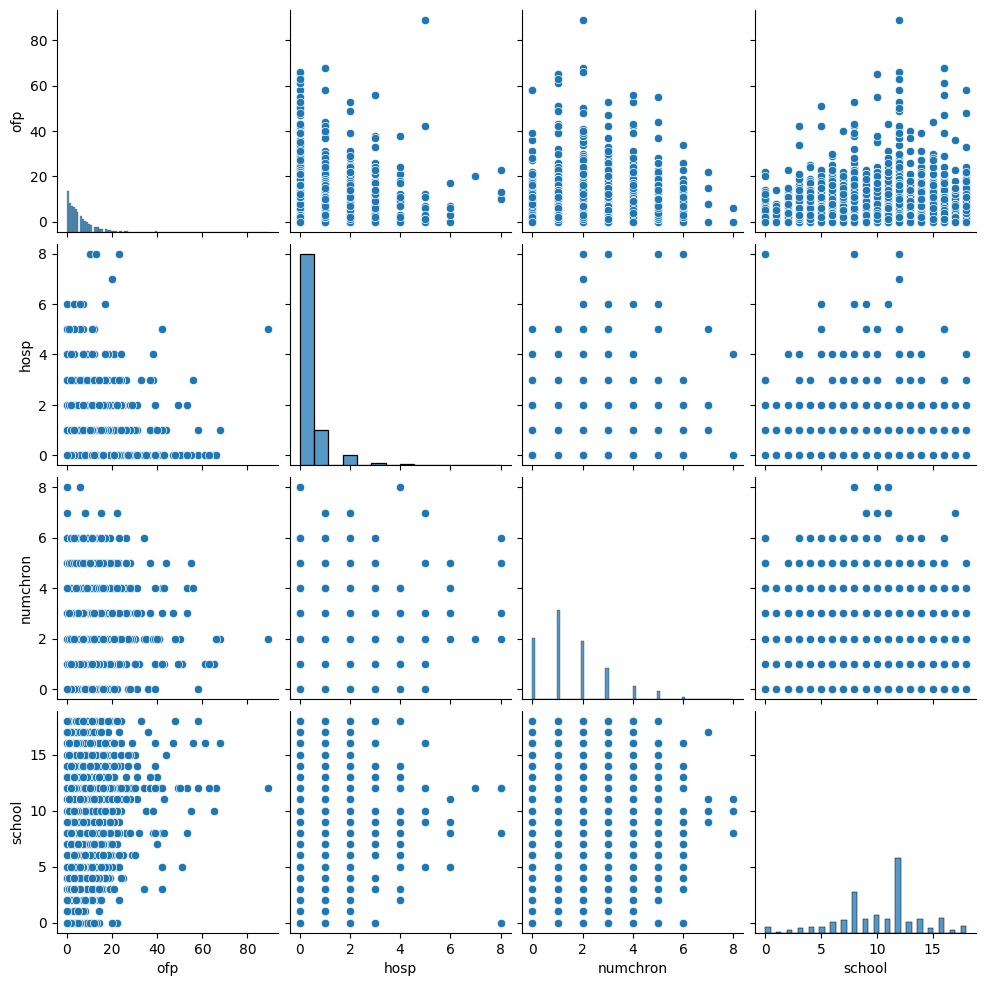

In [39]:
sns.pairplot(df)

In [32]:
df['gender'].value_counts()

gender
female    2628
male      1778
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x2054ef066e0>,
 [Text(0, 0, 'no'), Text(1, 0, 'yes')])

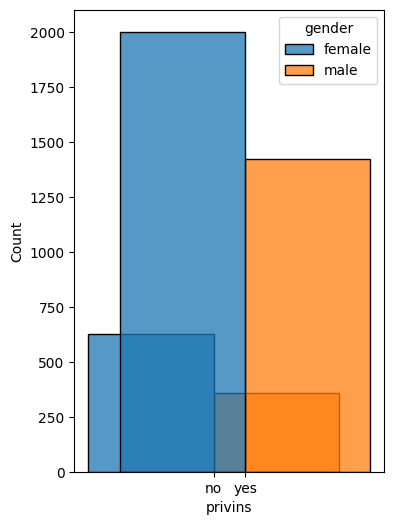

In [29]:
plt.figure(figsize=(4,6))
sns.histplot(data=df, x='privins', hue='gender',multiple="dodge", shrink=8)
plt.xticks([0,1])

([<matplotlib.axis.XTick at 0x205519ed750>,
 [Text(0, 0, 'no'), Text(1, 0, 'yes')])

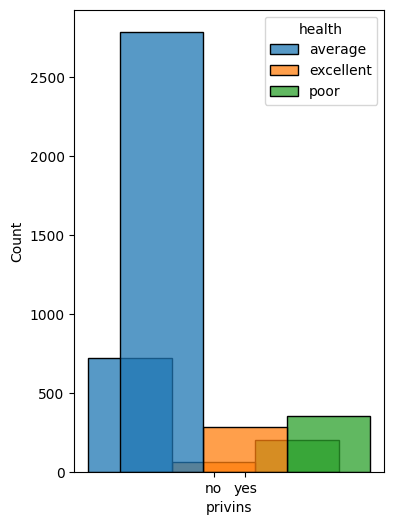

In [42]:
plt.figure(figsize=(4,6))
sns.histplot(data=df, x='privins', hue='health',multiple="dodge", shrink=8)
plt.xticks([0,1])

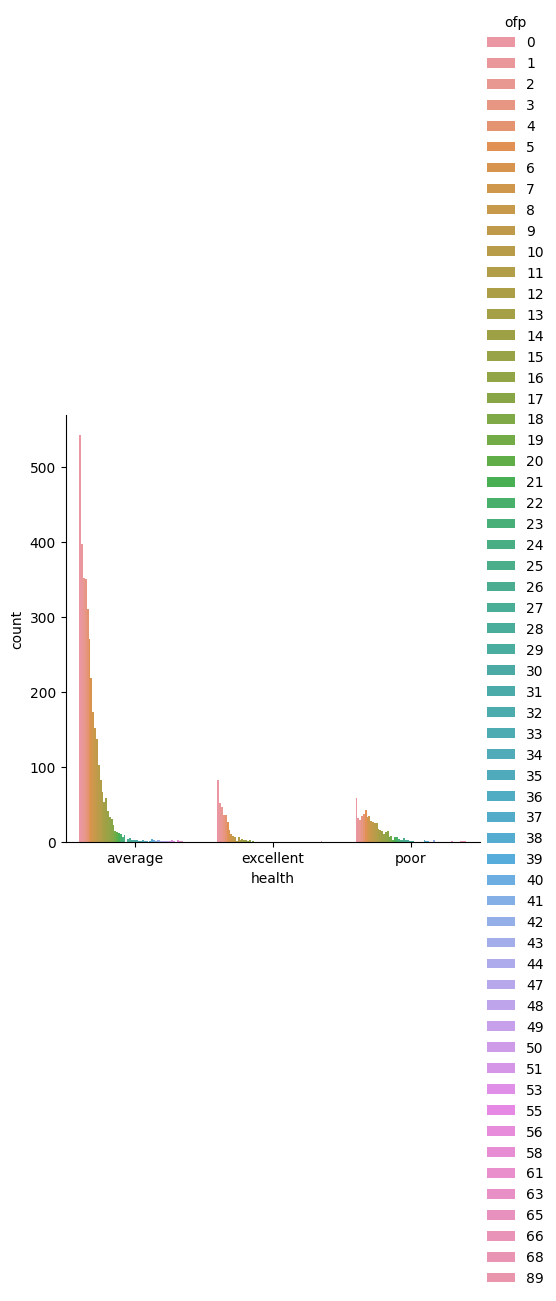

In [51]:
sns.catplot(x='health', hue='ofp', kind='count', data=df)

1. Podemos observar que o número de consultas diminui conforme a saúde do paciente piora

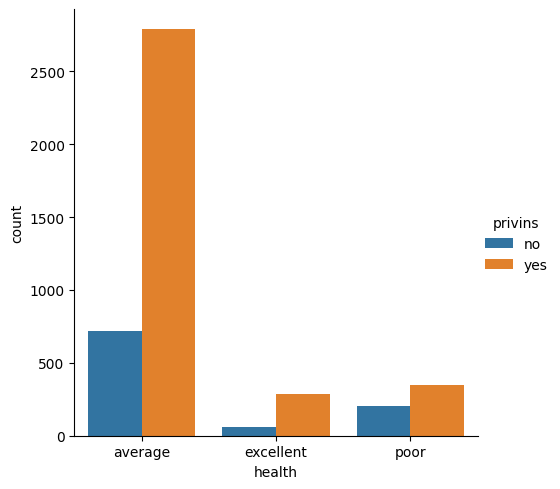

In [52]:
sns.catplot(x='health', hue='privins', kind='count', data=df)

2. Convênios privados dão muito mais acesso a hospitalizações do que convênios públicos

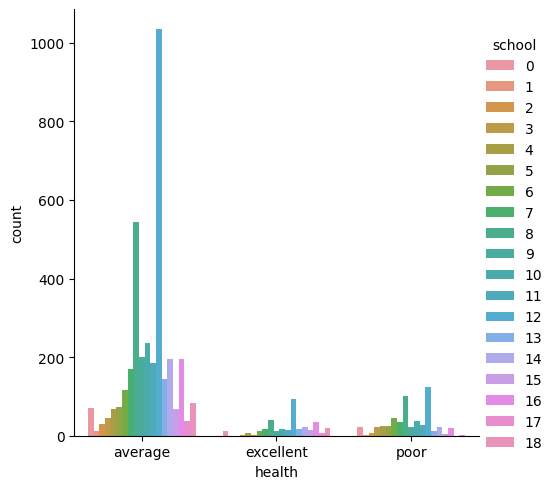

In [53]:
sns.catplot(x='health', hue='school', kind='count', data=df)

3. Escolaridade não afeta tanto

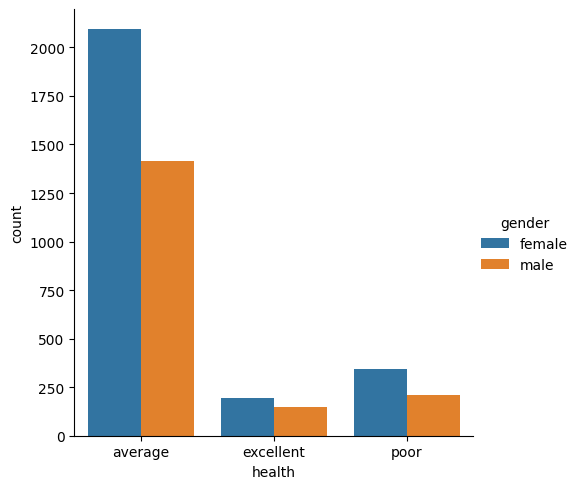

In [54]:
sns.catplot(x='health', hue='gender', kind='count', data=df)